# Personalized Recommendation System for E-commerce

### Import Libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Natural Language Processing
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Other
import os
import json

# Download NLTK resources if not already done
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load the Dataset

In [2]:
# Load datasets
dataset= pd.read_csv('C:/Users/USER/Desktop/IRWA Project/Model 02/DatafinitiElectronicsProductsPricingData.csv')
dataset

id  prices.amountMax  prices.amountMin  \
0      AVphzgbJLJeJML43fA0o            104.99            104.99   
1      AVpgMuGwLJeJML43KY_c             69.00             64.99   
2      AVpgMuGwLJeJML43KY_c             69.00             69.00   
3      AVpgMuGwLJeJML43KY_c             69.99             69.99   
4      AVpgMuGwLJeJML43KY_c             66.99             66.99   
...                     ...               ...               ...   
14587  AVpgibRDLJeJML43PTZX             65.99             65.99   
14588  AVpgibRDLJeJML43PTZX             58.99             58.99   
14589  AVpgibRDLJeJML43PTZX             58.49             58.49   
14590  AVpgibRDLJeJML43PTZX             77.98             77.98   
14591  AVpgibRDLJeJML43PTZX             71.95             71.95   

      prices.availability prices.condition prices.currency  \
0                     Yes              New             USD   
1                In Stock              New             USD   
2                In Stock              New             USD   
3                     Yes              New             USD   
4                     Yes              New             USD   
...                   ...              ...             ...   
14587                 NaN              NaN             USD   
14588                 Yes              New             USD   
14589            In Stock              New             USD   
14590                 NaN              NaN             USD   
14591                 NaN              new             USD   

                                         prices.dateSeen  prices.isSale  \
0      2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...          False   
1                                   2017-12-14T06:00:00Z           True   
2                                   2017-09-08T05:00:00Z          False   
3                                   2017-10-10T05:00:00Z          False   
4                                   2017-08-28T07:00:00Z          False   
...                                                  ...            ...   
14587                               2015-09-05T00:00:00Z           True   
14588  2017-10-10T19:00:00Z,2017-09-06T17:00:00Z,2017...          False   
14589                               2018-03-05T11:00:00Z          False   
14590                               2016-03-22T00:00:00Z           True   
14591                               2015-12-05T00:00:00Z          False   

                     prices.merchant     prices.shipping  ...  \
0                        Bestbuy.com                 NaN  ...   
1                        Walmart.com           Expedited  ...   
2                        Walmart.com           Expedited  ...   
3                        Bestbuy.com                 NaN  ...   
4                        Bestbuy.com                 NaN  ...   
...                              ...                 ...  ...   
14587                            NaN  USD 13.81 shipping  ...   
14588                    Bestbuy.com                 NaN  ...   
14589                    Walmart.com            Standard  ...   
14590                            NaN                 NaN  ...   
14591  Beach Audio Inc - Walmart.com                 NaN  ...   

                                                    name primaryCategories  \
0      Sanus VLF410B1 10-Inch Super Slim Full-Motion ...       Electronics   
1      Boytone - 2500W 2.1-Ch. Home Theater System - ...       Electronics   
2      Boytone - 2500W 2.1-Ch. Home Theater System - ...       Electronics   
3      Boytone - 2500W 2.1-Ch. Home Theater System - ...       Electronics   
4      Boytone - 2500W 2.1-Ch. Home Theater System - ...       Electronics   
...                                                  ...               ...   
14587  naxa - 2.1-Channel Soundbar with 50-Watt Digit...       Electronics   
14588  naxa - 2.1-Channel Soundbar with 50-Watt Digit...       Electronics   
14589  naxa - 2.1-Channel Soundbar with 50-Watt Digit...       Electronics   
14590  naxa -

### Dateset Description

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14592 non-null  object 
 1   prices.amountMax     14592 non-null  float64
 2   prices.amountMin     14592 non-null  float64
 3   prices.availability  12667 non-null  object 
 4   prices.condition     13189 non-null  object 
 5   prices.currency      14592 non-null  object 
 6   prices.dateSeen      14592 non-null  object 
 7   prices.isSale        14592 non-null  bool   
 8   prices.merchant      13820 non-null  object 
 9   prices.shipping      8793 non-null   object 
 10  prices.sourceURLs    14592 non-null  object 
 11  asins                14592 non-null  object 
 12  brand                14592 non-null  object 
 13  categories           14592 non-null  object 
 14  dateAdded            14592 non-null  object 
 15  dateUpdated          14592 non-null 

### Remove Nessasary Columns

##### Find Null Values

In [4]:
dataset.isnull().sum()

id                         0
prices.amountMax           0
prices.amountMin           0
prices.availability     1925
prices.condition        1403
prices.currency            0
prices.dateSeen            0
prices.isSale              0
prices.merchant          772
prices.shipping         5799
prices.sourceURLs          0
asins                      0
brand                      0
categories                 0
dateAdded                  0
dateUpdated                0
ean                    10384
imageURLs                  0
keys                       0
manufacturer            6974
manufacturerNumber         0
name                       0
primaryCategories          0
sourceURLs                 0
upc                        0
weight                     0
Unnamed: 26            14553
Unnamed: 27            14574
Unnamed: 28            14586
Unnamed: 29            14580
Unnamed: 30            14586
dtype: int64

##### Remove columns with more than 30% missing values

In [5]:
# Calculate the percentage of missing values for each column
missing_percentage = (dataset.isnull().mean() * 100).round(2)

# Convert to string and append '%' sign
missing_percentage_percentage = missing_percentage.astype(str) + '%'
print(missing_percentage_percentage)

id                       0.0%
prices.amountMax         0.0%
prices.amountMin         0.0%
prices.availability    13.19%
prices.condition        9.61%
prices.currency          0.0%
prices.dateSeen          0.0%
prices.isSale            0.0%
prices.merchant         5.29%
prices.shipping        39.74%
prices.sourceURLs        0.0%
asins                    0.0%
brand                    0.0%
categories               0.0%
dateAdded                0.0%
dateUpdated              0.0%
ean                    71.16%
imageURLs                0.0%
keys                     0.0%
manufacturer           47.79%
manufacturerNumber       0.0%
name                     0.0%
primaryCategories        0.0%
sourceURLs               0.0%
upc                      0.0%
weight                   0.0%
Unnamed: 26            99.73%
Unnamed: 27            99.88%
Unnamed: 28            99.96%
Unnamed: 29            99.92%
Unnamed: 30            99.96%
dtype: object


In [6]:
# Get the names of columns with more than 30% missing values
high_missing_cols = missing_percentage[missing_percentage > 30].index.tolist()
print("Columns with more than 30% missing values:\n", high_missing_cols)

# Drop those columns from the dataset
dataset = dataset.drop(columns=high_missing_cols)

Columns with more than 30% missing values:
 ['prices.shipping', 'ean', 'manufacturer', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30']


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14592 non-null  object 
 1   prices.amountMax     14592 non-null  float64
 2   prices.amountMin     14592 non-null  float64
 3   prices.availability  12667 non-null  object 
 4   prices.condition     13189 non-null  object 
 5   prices.currency      14592 non-null  object 
 6   prices.dateSeen      14592 non-null  object 
 7   prices.isSale        14592 non-null  bool   
 8   prices.merchant      13820 non-null  object 
 9   prices.sourceURLs    14592 non-null  object 
 10  asins                14592 non-null  object 
 11  brand                14592 non-null  object 
 12  categories           14592 non-null  object 
 13  dateAdded            14592 non-null  object 
 14  dateUpdated          14592 non-null  object 
 15  imageURLs            14592 non-null 

##### Find Duplicates

In [8]:
# Count the number of duplicate rows
duplicate_count = dataset.duplicated().sum()

# Display the count of duplicate rows
print("Original dataset shape:", dataset.shape)
print("Count of duplicate rows in the dataset:", duplicate_count)

Original dataset shape: (14592, 23)
Count of duplicate rows in the dataset: 13


In [9]:
# Remove duplicate rows from the dataset
dataset = dataset.drop_duplicates()

# Display the shape of the original and cleaned datasets
print("Cleaned dataset shape:", dataset.shape)
dataset.isnull().sum()

Cleaned dataset shape: (14579, 23)


id                        0
prices.amountMax          0
prices.amountMin          0
prices.availability    1916
prices.condition       1394
prices.currency           0
prices.dateSeen           0
prices.isSale             0
prices.merchant         761
prices.sourceURLs         0
asins                     0
brand                     0
categories                0
dateAdded                 0
dateUpdated               0
imageURLs                 0
keys                      0
manufacturerNumber        0
name                      0
primaryCategories         0
sourceURLs                0
upc                       0
weight                    0
dtype: int64

##### Get Merchant names using SourceUrls

In [10]:
import pandas as pd
from urllib.parse import urlparse

# Function to extract web name without 'www'
def get_merchant_name(url):
    domain = urlparse(url).netloc
    return domain.replace('www.', '')

# Assuming the correct column name is 'sourceURLs' 
dataset['prices.merchant'] = dataset['prices.sourceURLs'].apply(get_merchant_name)

# Displaying the updated DataFrame
print(dataset['prices.merchant'])

0        bestbuy.com
1        walmart.com
2        walmart.com
3        bestbuy.com
4        bestbuy.com
            ...     
14587     amazon.com
14588    bestbuy.com
14589    walmart.com
14590    walmart.com
14591    walmart.com
Name: prices.merchant, Length: 14579, dtype: object


In [11]:
import pandas as pd

# Fill null values in 'availability' and 'condition' columns with 'unknown'
dataset['prices.availability'] = dataset['prices.availability'].fillna('unknown')
dataset['prices.condition'] = dataset['prices.condition'].fillna('unknown')

In [12]:
dataset.isnull().sum()

id                     0
prices.amountMax       0
prices.amountMin       0
prices.availability    0
prices.condition       0
prices.currency        0
prices.dateSeen        0
prices.isSale          0
prices.merchant        0
prices.sourceURLs      0
asins                  0
brand                  0
categories             0
dateAdded              0
dateUpdated            0
imageURLs              0
keys                   0
manufacturerNumber     0
name                   0
primaryCategories      0
sourceURLs             0
upc                    0
weight                 0
dtype: int64

##### Remove unwanted column

                  prices.amountMax  prices.amountMin
prices.amountMax          1.000000          0.987603
prices.amountMin          0.987603          1.000000


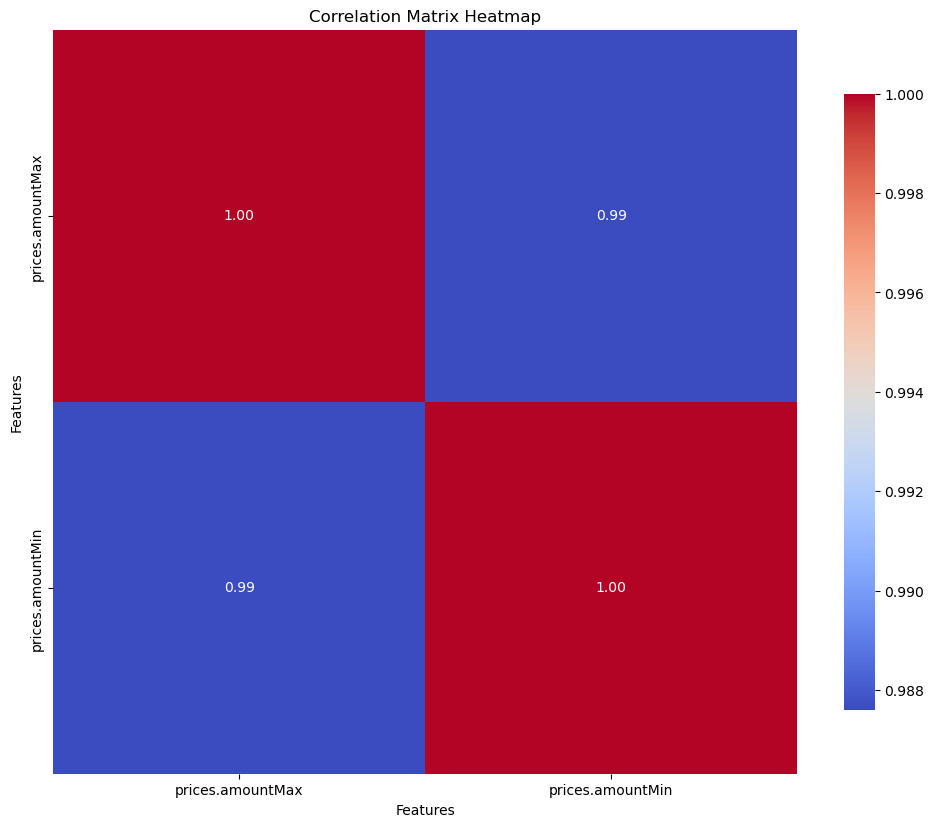

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#Select only numeric columns
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numeric_dataset.corr()

# Display the correlation matrix
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [14]:
# Remove Id column and columns having more than 30% missing values
columns_to_remove = ['prices.amountMax','prices.dateSeen','prices.isSale','asins','dateAdded','dateUpdated','keys','manufacturerNumber','primaryCategories','sourceURLs','upc','weight']
dataset = dataset.drop(columns=columns_to_remove)
print("New dataset shape:", dataset.shape)

New dataset shape: (14579, 11)


In [15]:
# Rename columns
dataset.rename(columns={
    'id': 'product_id',
    'prices.amountMin': 'min_price',
    'prices.availability': 'availability',
    'prices.condition': 'condition',
    'prices.currency': 'currency',
    'prices.merchant': 'merchant',
    'prices.sourceURLs': 'source_urls',
    'brand': 'brand',
    'categories': 'categories',
    'imageURLs': 'image_urls',
    'name': 'name'
}, inplace=True)

# Check the new column names
print(dataset.columns)


Index(['product_id', 'min_price', 'availability', 'condition', 'currency',
       'merchant', 'source_urls', 'brand', 'categories', 'image_urls', 'name'],
      dtype='object')


##### Find Unique Values

In [16]:
# Check for unique values in each column
unique_values = dataset.nunique()
print("Number of unique values in each column:\n", unique_values)

# Identify columns that might be unique identifiers
irrelevant_cols = unique_values[unique_values == dataset.shape[0]].index.tolist()
print("Potential irrelevant features (unique identifiers):", irrelevant_cols)

# Optionally, drop these columns
dataset = dataset.drop(columns=irrelevant_cols)

Number of unique values in each column:
 product_id      1245
min_price       4907
availability      18
condition         19
currency           5
merchant          33
source_urls     8529
brand            309
categories      1199
image_urls      1242
name            1229
dtype: int64
Potential irrelevant features (unique identifiers): []


In [17]:
# Loop through each column and display the unique values
for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {len(unique_values)}\n")

Column: product_id
Unique Values: ['AVphzgbJLJeJML43fA0o' 'AVpgMuGwLJeJML43KY_c' 'AVpe9FXeLJeJML43zHrq' ...
 'AVphibxI1cnluZ0-DpxG' 'AVpgrtW3ilAPnD_xv67M' 'AVpgibRDLJeJML43PTZX']
Number of Unique Values: 1245

Column: min_price
Unique Values: [104.99  64.99  69.   ...  81.52  69.55  77.98]
Number of Unique Values: 4907

Column: availability
Unique Values: ['Yes' 'In Stock' 'TRUE' 'undefined' 'yes' 'Out Of Stock' 'Special Order'
 'No' 'More on the Way' 'sold' 'FALSE' 'Retired' '32 available'
 '7 available' 'unknown' 'Limited Stock' 'Discontinued' 'More Coming Soon']
Number of Unique Values: 18

Column: condition
Unique Values: ['New' 'new' 'Seller refurbished' 'Used' 'pre-owned' 'Refurbished'
 'Manufacturer refurbished' 'New other (see details)' 'refurbished'
 'New Kicker BT2 41IK5BT2V2 Wireless Bluetooth USB Audio System Black + Remote, Power Supply (volts, ampere): 24, 2.9, Square Reflex Subwoofer (in., mm): 6 x 6", Stereo Amp Power with DSP (watts): 50, App for customizing - KickStar

#### Standardize the values by mapping similar terms to a common label

**Mapping for prices.availability**

In [18]:
import pandas as pd

# Define a mapping dictionary
availability_mapping = {
    'In Stock': 'In Stock',
    'Yes': 'In Stock',
    'TRUE': 'In Stock',
    'yes': 'In Stock',
    '32 available': 'In Stock',
    '7 available': 'In Stock',
    'More on the Way': 'In Stock',
    
    'Out Of Stock': 'Out of Stock',
    'No': 'Out of Stock',
    'FALSE': 'Out of Stock',
    'Retired': 'Out of Stock',
    'Limited Stock': 'Out of Stock',
    'Discontinued': 'Out of Stock',
    'sold': 'Out of Stock',
    
    'Special Order': 'Special Order',
    'More Coming Soon': 'Special Order',
    
    'unknown': 'Undefined',
    None: 'Undefined',  # Handle NaN values
}

# Map the availability values
dataset['availability'] = dataset['availability'].map(availability_mapping)

# Get unique values after mapping
unique_availability = dataset['availability'].unique()
print("Unique Values After Mapping:", unique_availability)

# Check for missing values
print("Missing Values After Mapping:")
print(dataset.isnull().sum())

Unique Values After Mapping: ['In Stock' nan 'Out of Stock' 'Special Order' 'Undefined']
Missing Values After Mapping:
product_id       0
min_price        0
availability    49
condition        0
currency         0
merchant         0
source_urls      0
brand            0
categories       0
image_urls       0
name             0
dtype: int64


In [19]:
# Fill NaN values in the availability column with 'Unknown'
dataset['availability'] = dataset['availability'].fillna('Undefined')

# Check the unique values again to confirm the changes
unique_availability_after_fill = dataset['availability'].unique()
print("Unique Values After Filling NaN:", unique_availability_after_fill)

# Check for missing values
missing_values = dataset.isnull().sum()
print(missing_values)

Unique Values After Filling NaN: ['In Stock' 'Undefined' 'Out of Stock' 'Special Order']
product_id      0
min_price       0
availability    0
condition       0
currency        0
merchant        0
source_urls     0
brand           0
categories      0
image_urls      0
name            0
dtype: int64


**Mapping for prices.condition**

In [20]:
import pandas as pd

# Define a mapping dictionary
condition_mapping = {
    'New': 'New',
    'new': 'New',
    'Brand New': 'New',
    'Condition: Brand New!': 'New',
    'Condition: BRAND NEW!': 'New',
    'New other (see details)': 'New',

    'Seller refurbished': 'Refurbished',
    'Used': 'Used',
    'Refurbished': 'Refurbished',
    'Manufacturer refurbished': 'Refurbished',
    'pre-owned': 'Refurbished',
    'refurbished': 'Refurbished',
    'Magnet - Neodymium, SearsCondition - Refurbished': 'Refurbished',
    
    'For parts or not working': 'Used/For Parts',
    'unknown': 'Undefined',
    
    None: 'Undefined',  # Handle NaN values
}

dataset['condition'] = dataset['condition'].map(condition_mapping)
unique_condition = dataset['condition'].unique()
print("Unique Values After Mapping:", unique_condition)
print(dataset.isnull().sum())

Unique Values After Mapping: ['New' 'Refurbished' 'Used' nan 'Undefined' 'Used/For Parts']
product_id      0
min_price       0
availability    0
condition       8
currency        0
merchant        0
source_urls     0
brand           0
categories      0
image_urls      0
name            0
dtype: int64


In [21]:
# Fill NaN values in the condition column with 'Unknown'
dataset['condition'] = dataset['condition'].fillna('Undefined')

# Check the unique values again to confirm the changes
unique_condition_after_fill = dataset['condition'].unique()
print("Unique Values After Filling NaN:", unique_condition_after_fill)

# Check for missing values
missing_values = dataset.isnull().sum()
print(missing_values)

Unique Values After Filling NaN: ['New' 'Refurbished' 'Used' 'Undefined' 'Used/For Parts']
product_id      0
min_price       0
availability    0
condition       0
currency        0
merchant        0
source_urls     0
brand           0
categories      0
image_urls      0
name            0
dtype: int64


In [22]:
# Check for unique values in each column
unique_values = dataset.nunique()
print("Number of unique values in each column:\n", unique_values)

# Identify columns that might be unique identifiers
irrelevant_cols = unique_values[unique_values == dataset.shape[0]].index.tolist()
print("Potential irrelevant features (unique identifiers):", irrelevant_cols)

# Optionally, drop these columns
dataset = dataset.drop(columns=irrelevant_cols)

Number of unique values in each column:
 product_id      1245
min_price       4907
availability       4
condition          5
currency           5
merchant          33
source_urls     8529
brand            309
categories      1199
image_urls      1242
name            1229
dtype: int64
Potential irrelevant features (unique identifiers): []


In [23]:
# List of columns to check for garbage values
column_names = [
    'product_id', 
    'min_price',
    'availability',
    'condition',
    'currency',
    'merchant',
    'source_urls',
    'brand',
    'categories',
    'image_urls',
    'name'
]

# Define a function to check for garbage values
def find_garbage_values(column):
    if column.dtype == 'object':
        # Check for non-alphanumeric characters
        garbage_values = column[~column.str.match(r'^[a-zA-Z0-9\s]+$', na=False)]
    elif column.dtype in ['int64', 'float64']:
        # Check for negative values and NaN values
        garbage_values = column[(column < 0) | (column.isnull())]
    else:
        garbage_values = pd.Series()  # For other types, return an empty Series
    
    return garbage_values

# Initialize a list to store garbage counts
garbage_counts_list = []

# Loop through the list of columns and find garbage values
for column_name in column_names:
    garbage = find_garbage_values(dataset[column_name])
    
    # Count the garbage values
    garbage_count = garbage.count()
    
    # Append the result to the garbage_counts_list
    garbage_counts_list.append({'Column Name': column_name, 'Garbage Count': garbage_count})

# Convert the list to a DataFrame
garbage_counts = pd.DataFrame(garbage_counts_list)

# Display the garbage counts DataFrame
print(garbage_counts)

     Column Name  Garbage Count
0     product_id           9507
1      min_price              0
2   availability              0
3      condition              5
4       currency              0
5       merchant          14579
6    source_urls          14579
7          brand            440
8     categories          14579
9     image_urls          14579
10          name          12587


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14579 entries, 0 to 14591
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    14579 non-null  object 
 1   min_price     14579 non-null  float64
 2   availability  14579 non-null  object 
 3   condition     14579 non-null  object 
 4   currency      14579 non-null  object 
 5   merchant      14579 non-null  object 
 6   source_urls   14579 non-null  object 
 7   brand         14579 non-null  object 
 8   categories    14579 non-null  object 
 9   image_urls    14579 non-null  object 
 10  name          14579 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [25]:
# Step 1: Convert to lowercase for each column
dataset['product_id'] = dataset['product_id'].str.lower()
dataset['name'] = dataset['name'].str.lower()
dataset['brand'] = dataset['brand'].str.lower()
dataset['categories'] = dataset['categories'].str.lower()

# Step 2: Replace non-alphanumeric characters with spaces for each column
dataset['product_id'] = dataset['product_id'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
dataset['name'] = dataset['name'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
dataset['brand'] = dataset['brand'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
dataset['categories'] = dataset['categories'].replace(r'[^a-zA-Z0-9]', " ", regex=True)

# Step 3: Strip leading and trailing whitespace for each column (optional)
dataset['product_id'] = dataset['product_id'].str.strip()
dataset['name'] = dataset['name'].str.strip()
dataset['brand'] = dataset['brand'].str.strip()
dataset['categories'] = dataset['categories'].str.strip()

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(dataset[['product_id']].head())
print('')
print(dataset[['name']].head())
print('')
print(dataset[['brand']].head())
print('')
print(dataset[['categories']].head())


Cleaned Dataset:
             product_id
0  avphzgbjljejml43fa0o
1  avpgmugwljejml43ky c
2  avpgmugwljejml43ky c
3  avpgmugwljejml43ky c
4  avpgmugwljejml43ky c

                                                name
0  sanus vlf410b1 10 inch super slim full motion ...
1  boytone   2500w 2 1 ch  home theater system   ...
2  boytone   2500w 2 1 ch  home theater system   ...
3  boytone   2500w 2 1 ch  home theater system   ...
4  boytone   2500w 2 1 ch  home theater system   ...

     brand
0    sanus
1  boytone
2  boytone
3  boytone
4  boytone

                                          categories
0  audio   video accessories tv mounts tv accesso...
1  stereos portable bluetooth speakers tv  video ...
2  stereos portable bluetooth speakers tv  video ...
3  stereos portable bluetooth speakers tv  video ...
4  stereos portable bluetooth speakers tv  video ...


In [26]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to tokenize and stem a text
def tokenize_and_stem(text):
    tokens = word_tokenize(text.lower())
    stemmed = [stemmer.stem(token) for token in tokens if token.isalnum()]  # Keep only alphanumeric tokens
    return ' '.join(stemmed)

In [27]:
dataset['search'] = dataset['product_id'] + " " + dataset['name'] + " " + dataset['brand'] + " " + dataset['categories']

In [28]:
# Function to compute cosine similarity
def cosine_sim(txt1, txt2):
    # Create the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    matrix = vectorizer.fit_transform([txt1, txt2])
    similarity = cosine_similarity(matrix)[0][1]
    return similarity

In [29]:
# Recommendation function
def recommendation(query):
    tokenized_query = tokenize_and_stem(query)
    dataset['similarity'] = dataset['search'].apply(lambda x: cosine_sim(tokenized_query, x))
    final_df = dataset.sort_values(by='similarity', ascending=False).head(10)
    return final_df[['product_id','name', 'brand', 'categories', 'similarity']]

In [30]:
# Example usage: Get recommendations for a query
recommendation("home theater system")

product_id                                               name  \
5284  avpfsylfljejml436udp  sony   5 1 ch  3d   smart blu ray home theater...   
5280  avpfsylfljejml436udp  sony   5 1 ch  3d   smart blu ray home theater...   
5286  avpfsylfljejml436udp  sony   5 1 ch  3d   smart blu ray home theater...   
5285  avpfsylfljejml436udp  sony   5 1 ch  3d   smart blu ray home theater...   
5273  avpfsylfljejml436udp  sony   5 1 ch  3d   smart blu ray home theater...   
5283  avpfsylfljejml436udp  sony   5 1 ch  3d   smart blu ray home theater...   
5282  avpfsylfljejml436udp  sony   5 1 ch  3d   smart blu ray home theater...   
5281  avpfsylfljejml436udp  sony   5 1 ch  3d   smart blu ray home theater...   
5279  avpfsylfljejml436udp  sony   5 1 ch  3d   smart blu ray home theater...   
5268  avpfsylfljejml436udp  sony   5 1 ch  3d   smart blu ray home theater...   

     brand                                         categories  similarity  
5284  sony  electronics home audio   theater home theater ...    0.586051  
5280  sony  electronics home audio   theater home theater ...    0.586051  
5286  sony  electronics home audio   theater home theater ...    0.586051  
5285  sony  electronics home audio   theater home theater ...    0.586051  
5273  sony  electronics home audio   theater home theater ...    0.586051  
5283  sony  electronics home audio   theater home theater ...    0.586051  
5282  sony  electronics home audio   theater home theater ...    0.586051  
5281  sony  electronics home audio   theater home theater ...    0.586051  
5279  sony  electronics home audio   theater home theater ...    0.586051  
5268  sony  electronics home audio   theater home theater ...    0.586051

In [31]:
dataset.columns

Index(['product_id', 'min_price', 'availability', 'condition', 'currency',
       'merchant', 'source_urls', 'brand', 'categories', 'image_urls', 'name',
       'search', 'similarity'],
      dtype='object')

In [32]:
# Example function to truncate URLs
def truncate_url(image_urls, length=2000):
    return image_urls if len(image_urls) <= length else image_urls[:length] + '...'

dataset['image_urls'] = dataset['image_urls'].apply(truncate_url)
dataset['source_urls'] = dataset['source_urls'].apply(truncate_url)

In [33]:
import pandas as pd

columns_to_save = ['product_id', 'min_price', 'availability', 'condition', 
                   'currency', 'merchant', 'source_urls', 'brand', 
                   'categories', 'image_urls', 'name', 'search']

# Create a new DataFrame with the specified columns
subset_df = dataset[columns_to_save]

# Save the new DataFrame to an Excel file
output_file_path = 'cleaned_dataset_final.xlsx'  # Specify your desired output file path
subset_df.to_excel(output_file_path, index=False)  # Set index=False to avoid saving the index column


In [34]:
import pandas as pd

# Define the columns to save
columns_to_save = ['product_id', 'min_price', 'availability', 'condition', 
                   'currency', 'merchant', 'source_urls', 'brand', 
                   'categories', 'image_urls', 'name', 'search']

# Create a new DataFrame with the specified columns
subset_df = dataset[columns_to_save]

# Save the new DataFrame to a CSV file
output_file_path = 'cleaned_dataset_final.csv'  # Specify your desired output file path
subset_df.to_csv(output_file_path, index=False)  # Set index=False to avoid saving the index column

print(f"Data saved successfully to {output_file_path}")


Data saved successfully to cleaned_dataset_final.csv
